In [12]:
import sklearn
from sklearn import cluster
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community

In [17]:
co_matrix = pd.read_csv('co_occurence.csv', index_col = 0)

In [18]:
co_matrix = co_matrix.loc[co_matrix.index.dropna()]

In [19]:
del co_matrix['Unnamed: 735']

In [16]:
co_matrix = co_matrix.iloc[0:50, 0:50]

In [6]:
total_pars = 5016
for i in co_matrix.columns: 
    colsum = co_matrix[i].sum()
    for j, r in co_matrix.iterrows():
        cosum = co_matrix[j].sum()
        a = np.log((r/total_pars) / (colsum/total_pars)*(cosum/total_pars)+1)
        co_matrix[i] = a

In [7]:
co_matrix.head()

,mr speaker,the congress,fellow citizen,the nation,selfgovernment,the preservation,liberty,the hand,the american people,our friend,...,million,their child,the state,the union,the situation,this time,a series,unemployment,inflation,percent
mr speaker,0.000000,6.179174e-09,1.091065e-07,6.348677e-09,2.314381e-08,2.882060e-08,1.700993e-08,2.554334e-08,1.218095e-08,7.071721e-08,...,2.307389e-08,7.873668e-08,3.729228e-09,5.803540e-09,6.109967e-08,3.349763e-08,1.316803e-07,1.032089e-07,5.785953e-08,0.0
the congress,0.004932,1.799903e-04,3.973114e-09,2.311871e-10,8.427818e-10,1.049502e-09,6.194165e-10,9.301606e-10,4.435694e-10,2.575167e-09,...,8.402357e-10,2.867196e-09,1.357998e-10,2.113358e-10,2.224944e-09,1.219816e-09,4.795138e-09,3.758351e-09,2.106955e-09,0.0
fellow citizen,0.000000,0.000000e+00,0.000000e+00,4.081593e-09,1.487926e-08,1.852889e-08,1.093576e-08,1.642193e-08,7.831190e-09,4.546441e-08,...,1.483431e-08,5.062016e-08,2.397537e-09,3.731122e-09,3.928125e-08,2.153577e-08,8.465786e-08,6.635346e-08,3.719815e-08,0.0
the nation,0.000412,1.500043e-05,2.648316e-04,1.541191e-05,8.659005e-10,1.078291e-09,6.364078e-10,9.556760e-10,4.557370e-10,2.645807e-09,...,8.632843e-10,2.945847e-09,1.395251e-10,2.171330e-10,2.285977e-09,1.253277e-09,4.926675e-09,3.861448e-09,2.164751e-09,0.0
selfgovernment,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.930781e-09,2.319949e-09,3.483802e-09,1.661335e-09,9.644971e-09,...,3.147000e-09,1.073873e-08,5.086216e-10,7.915326e-10,8.333255e-09,4.568671e-09,1.795960e-08,1.407644e-08,7.891340e-09,0.0


In [20]:
sim = pd.DataFrame(cosine_similarity(co_matrix), index=co_matrix.columns, columns = co_matrix.columns)
sim.head()

,mr speaker,the congress,fellow citizen,the nation,selfgovernment,the preservation,liberty,the hand,the american people,our friend,...,africa,the threat,the united nation,drug,iran,terror,terrorist,iraq,billion dollar,million dollar
mr speaker,1.000000,0.151085,0.478677,0.187275,0.090257,0.179590,0.119522,0.160577,0.198810,0.080581,...,0.140826,0.082125,0.033191,0.077456,0.063604,0.093674,0.106261,0.080366,0.031744,0.050022
the congress,0.151085,1.000000,0.406270,0.849988,0.593742,0.781588,0.703294,0.813094,0.708981,0.376384,...,0.583817,0.370250,0.331427,0.263055,0.339511,0.330741,0.340259,0.347699,0.150751,0.165883
fellow citizen,0.478677,0.406270,1.000000,0.452439,0.344017,0.436207,0.407411,0.356378,0.499629,0.299544,...,0.337163,0.323391,0.220834,0.229841,0.284385,0.246893,0.318342,0.308613,0.057189,0.038573
the nation,0.187275,0.849988,0.452439,1.000000,0.703858,0.858783,0.807969,0.862823,0.838938,0.504289,...,0.633467,0.526844,0.462671,0.329385,0.473006,0.438493,0.472849,0.488852,0.118767,0.131138
selfgovernment,0.090257,0.593742,0.344017,0.703858,1.000000,0.652673,0.766988,0.662400,0.745507,0.513135,...,0.469193,0.566625,0.406833,0.313831,0.535015,0.423646,0.511349,0.549975,0.066478,0.047512


['mr speaker', 'the congress', 'the price', 'the people', 'million', 'the state', 'the union', 'a series', 'construction', 'a reduction', 'the rate', 'increase', 'tax', 'the increase', 'the beginning', 'the expense', 'the cost', 'waste', 'fraud', 'this year', 'the budget', 'office', 'a change', 'law', 'revenue', 'the number', 'employee', 'the department', 'the last year', 'the system', 'the time', 'a bill', 'the next year', 'operation', 'aid', 'the federal government', 'the national government', 'the return', 'transportation', 'the extent', 'hand', 'legislation', 'dollar', 'service', 'the land', 'the enactment', 'the house', 'detail', 'the past year', 'the year', 'the difference', 'a period', 'the condition', 'the present', 'the evil', 'my message', 'the experience', 'my opinion', 'combination', 'corporation', 'experience', 'money', 'the public', 'the place', 'the farmer', 'connection', 'the power', 'the constitution', 'this power', 'practice', 'the several state', 'regulation', 'this 

drawing labels
saving


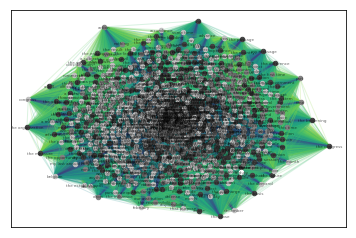

In [21]:
# establish graph
graph = nx.Graph(sim)

edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

#first compute the best partition
partition = community.best_partition(graph)

# first calculate k-means unsupervised
#kmeans = cluster.KMeans(n_clusters = 8).fit(co_matrix)
#co_matrix['scores'] = kmeans.labels_
#partition = co_matrix['scores'].to_dict()

#drawing
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(graph)
count = 0.
for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    print(list_nodes)
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))

print('drawing edges')
nx.draw_networkx_edges(graph, pos, alpha=0.2, edge_color = weights)
print('drawing labels')
nx.draw_networkx_labels(graph, pos, font_size = 4, alpha = 0.6)
#plt.figure(figsize=(100,100))
print('saving')
plt.savefig("testgraph.png", dpi=500)